In [1]:
import os
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.optim import Adam
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from torchmetrics import MeanAbsolutePercentageError


from data.dataloader import dataloader_info
from utils.utils import load_yaml_config, instantiate_from_config

from models.predictor import GRU
from models.solver import Trainer
from data.dataloader import dataloader_info
from utils.visualize import visualize_pca, visualize_tsne, visualize_kernel

import copy

/home/harim/Desktop/pyproject/Project_TS_Generation/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load configurations
configs = load_yaml_config("configs/stock_diff.yaml")
device = "cuda" if torch.cuda.is_available() else "cpu"

# Initialize Diffusion_TS Model
diffusion_ts = instantiate_from_config(configs['model']).to(device)
batch_size = 128

In [3]:
# dataloader
dl_info = dataloader_info(configs)
dl_info_test = dataloader_info(configs, train=False)

dl = dl_info["dataloader"]
dataset = dl_info['dataset']

In [4]:
testset = dl_info_test["dataset"]
trainset = dl_info["dataset"]
testset = testset.data
trainset = trainset.data

(3497, 23, 6)

In [7]:
# load original data
seq_length, feature_dim = dataset.window, dataset.feature_dim
idx = np.random.permutation(len(testset))[:3000]
train_data = trainset[idx]

In [9]:
train_data.shape

(2589, 23, 6)

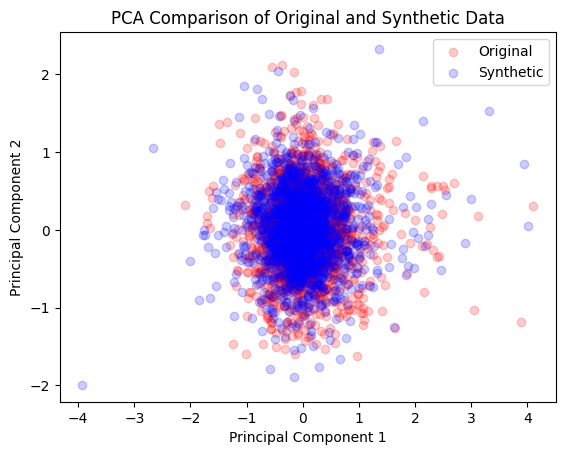

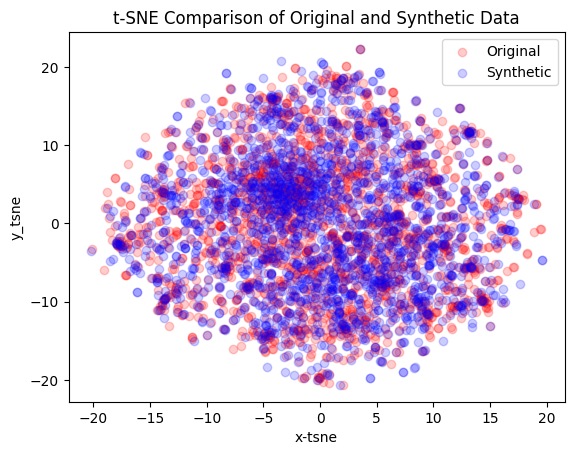

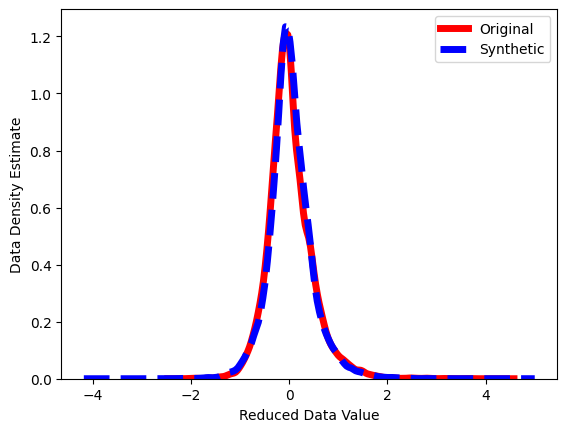

In [10]:
visualize_pca(train_data, testset, 2000)
visualize_tsne(train_data, testset, 2000)
visualize_kernel(train_data, testset, 2000)

In [15]:
data1 = train_data.mean(2)
data2 = testset.mean(2)

In [ ]:
from scipy.stats import ks_2samp

ks_stat, p_value = ks_2samp(data1, data2)
print(f"KS Statistic: {ks_stat}, p-value: {p_value}")